In [ ]:
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Machine Learning/train-val.csv')
test_data = pd.read_csv('/content/drive/My Drive/Machine Learning/test.csv')



data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,3423,2016-03-04,Tuggeranong,14.4,32.2,11.0,NaN,NaN,NE,22.0,...,81.0,32.0,1021.6,1018.0,NaN,NaN,18.4,31.2,1,0
1,6095,2013-06-23,GoldCoast,11.0,21.5,0.0,NaN,NaN,S,43.0,...,64.0,58.0,1024.1,1021.2,NaN,NaN,17.1,20.2,0,0
2,403,2009-07-05,Cobar,8.3,14.7,0.0,2.4,7.4,SSW,24.0,...,79.0,55.0,1021.8,1019.7,7.0,6.0,10.6,14.0,0,0
3,333,2014-10-12,BadgerysCreek,8.8,32.2,0.0,NaN,NaN,ENE,37.0,...,65.0,18.0,1017.5,1011.7,NaN,NaN,17.7,30.9,0,0
4,2085,2012-07-04,Sydney,7.2,16.2,0.0,3.6,6.4,NaN,NaN,...,55.0,43.0,1024.6,1025.1,3.0,7.0,9.6,15.9,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7262 entries, 0 to 7261
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             7262 non-null   int64  
 1   Date           7262 non-null   object 
 2   Location       7262 non-null   object 
 3   MinTemp        7237 non-null   float64
 4   MaxTemp        7251 non-null   float64
 5   Rainfall       7262 non-null   float64
 6   Evaporation    4223 non-null   float64
 7   Sunshine       3817 non-null   float64
 8   WindGustDir    6787 non-null   object 
 9   WindGustSpeed  6789 non-null   float64
 10  WindDir9am     6692 non-null   object 
 11  WindDir3pm     7049 non-null   object 
 12  WindSpeed9am   7207 non-null   float64
 13  WindSpeed3pm   7128 non-null   float64
 14  Humidity9am    7185 non-null   float64
 15  Humidity3pm    7094 non-null   float64
 16  Pressure9am    6576 non-null   float64
 17  Pressure3pm    6575 non-null   float64
 18  Cloud9am

In [ ]:
data['RainTomorrow'].unique()
data['RainTomorrow'].value_counts()

,count
RainTomorrow,
0,5623
1,1639


<Axes: >

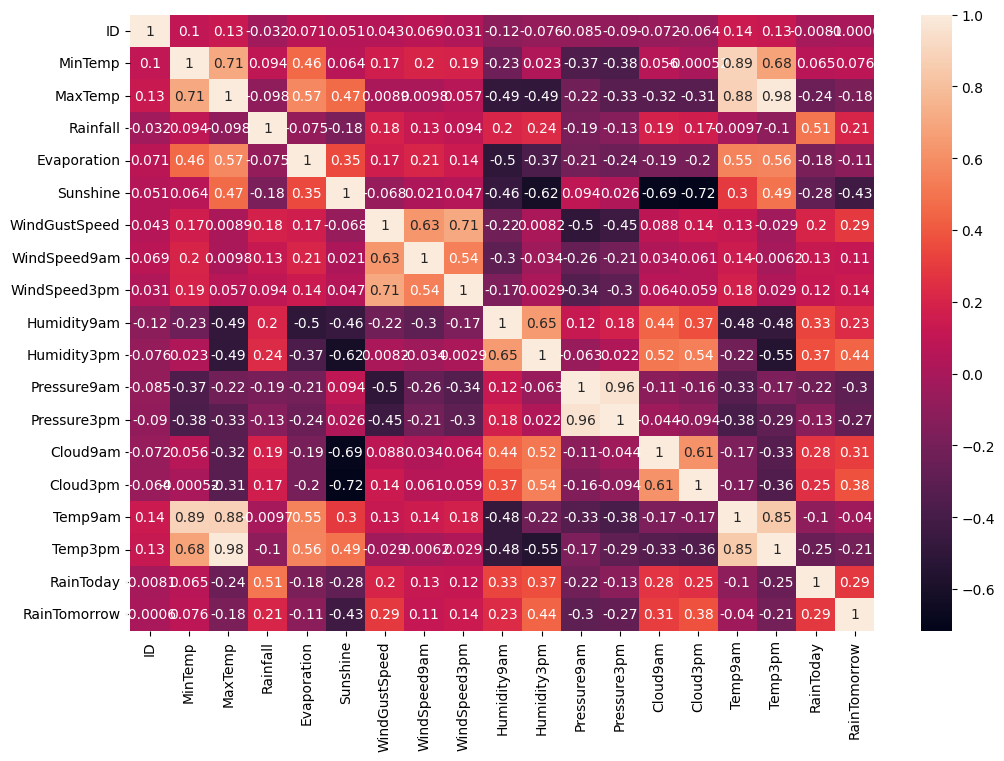

In [ ]:
numerical_data = data.select_dtypes(include=['number'])

corr = numerical_data.corr()
corr

%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)


In [ ]:
data.describe(include="object")
data.describe(include='all')

,ID,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,7262.000000,7262,7262,7237.000000,7251.000000,7262.000000,4223.000000,3817.000000,6787,6789.000000,...,7185.000000,7094.000000,6576.000000,6575.000000,4592.000000,4443.000000,7228.000000,7142.000000,7262.000000,7262.000000
unique,NaN,2268,49,NaN,NaN,NaN,NaN,NaN,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2010-06-01,Brisbane,NaN,NaN,NaN,NaN,NaN,W,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10,184,NaN,NaN,NaN,NaN,NaN,546,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4849.619113,NaN,NaN,10.638345,21.524562,2.302782,4.699005,7.356930,NaN,39.160701,...,70.242171,52.359459,1018.909367,1016.469262,4.368467,4.489534,15.426204,20.081686,0.228863,0.225695
std,2787.027799,NaN,NaN,5.994250,6.482395,8.027407,3.761805,3.539593,NaN,13.846248,...,18.807468,20.012168,7.061870,6.988741,2.909982,2.714390,6.079540,6.367390,0.420130,0.418068
min,2.000000,NaN,NaN,-7.600000,-3.700000,0.000000,0.000000,0.000000,NaN,9.000000,...,2.000000,1.000000,990.800000,989.900000,0.000000,0.000000,-5.200000,-4.100000,0.000000,0.000000
25%,2441.500000,NaN,NaN,6.400000,16.900000,0.000000,2.200000,4.900000,NaN,30.000000,...,58.000000,38.000000,1014.300000,1011.800000,1.000000,2.000000,11.200000,15.600000,0.000000,0.000000
50%,4857.000000,NaN,NaN,10.300000,20.800000,0.000000,4.000000,8.200000,NaN,37.000000,...,71.000000,53.000000,1019.000000,1016.600000,5.000000,5.000000,14.900000,19.300000,0.000000,0.000000
75%,7245.750000,NaN,NaN,14.500000,25.800000,0.800000,6.400000,10.200000,NaN,46.000000,...,85.000000,66.000000,1023.600000,1021.200000,7.000000,7.000000,19.300000,24.200000,0.000000,0.000000


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Season'] = data['Month'].apply(lambda x: (x % 12 + 3) // 3)

data.drop(['Date', 'MinTemp', 'Temp9am'], axis = 1, inplace=True)
X = data.drop(['ID'], axis = 1)

In [ ]:
data.describe(include = 'all')

,ID,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Month,Season
count,7262.000000,7262,7251.000000,7262.000000,4223.000000,3817.000000,6787,6789.000000,6692,7049,...,7094.000000,6576.000000,6575.000000,4592.000000,4443.000000,7142.000000,7262.000000,7262.000000,7262.000000,7262.000000
unique,NaN,49,NaN,NaN,NaN,NaN,16,NaN,16,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Brisbane,NaN,NaN,NaN,NaN,W,NaN,N,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,184,NaN,NaN,NaN,NaN,546,NaN,611,554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4849.619113,NaN,21.524562,2.302782,4.699005,7.356930,NaN,39.160701,NaN,NaN,...,52.359459,1018.909367,1016.469262,4.368467,4.489534,20.081686,0.228863,0.225695,6.983200,2.992151
std,2787.027799,NaN,6.482395,8.027407,3.761805,3.539593,NaN,13.846248,NaN,NaN,...,20.012168,7.061870,6.988741,2.909982,2.714390,6.367390,0.420130,0.418068,2.597976,0.819013
min,2.000000,NaN,-3.700000,0.000000,0.000000,0.000000,NaN,9.000000,NaN,NaN,...,1.000000,990.800000,989.900000,0.000000,0.000000,-4.100000,0.000000,0.000000,3.000000,2.000000
25%,2441.500000,NaN,16.900000,0.000000,2.200000,4.900000,NaN,30.000000,NaN,NaN,...,38.000000,1014.300000,1011.800000,1.000000,2.000000,15.600000,0.000000,0.000000,5.000000,2.000000
50%,4857.000000,NaN,20.800000,0.000000,4.000000,8.200000,NaN,37.000000,NaN,NaN,...,53.000000,1019.000000,1016.600000,5.000000,5.000000,19.300000,0.000000,0.000000,7.000000,3.000000
75%,7245.750000,NaN,25.800000,0.800000,6.400000,10.200000,NaN,46.000000,NaN,NaN,...,66.000000,1023.600000,1021.200000,7.000000,7.000000,24.200000,0.000000,0.000000,9.000000,4.000000


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2

numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = list(X.select_dtypes(include=['object', 'int32']).columns) + ['RainToday']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

y = data['RainTomorrow']
X.drop(['RainTomorrow'], axis = 1, inplace=True)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7262 entries, 0 to 7261
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       7262 non-null   object 
 1   MaxTemp        7251 non-null   float64
 2   Rainfall       7262 non-null   float64
 3   Evaporation    4223 non-null   float64
 4   Sunshine       3817 non-null   float64
 5   WindGustDir    6787 non-null   object 
 6   WindGustSpeed  6789 non-null   float64
 7   WindDir9am     6692 non-null   object 
 8   WindDir3pm     7049 non-null   object 
 9   WindSpeed9am   7207 non-null   float64
 10  WindSpeed3pm   7128 non-null   float64
 11  Humidity9am    7185 non-null   float64
 12  Humidity3pm    7094 non-null   float64
 13  Pressure9am    6576 non-null   float64
 14  Pressure3pm    6575 non-null   float64
 15  Cloud9am       4592 non-null   float64
 16  Cloud3pm       4443 non-null   float64
 17  Temp3pm        7142 non-null   float64
 18  RainToda

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


---K-Nearest Neighbors---
Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1694
           1       0.66      0.44      0.53       485

    accuracy                           0.82      2179
   macro avg       0.76      0.69      0.71      2179
weighted avg       0.81      0.82      0.81      2179



---Gaussian Naive Bayes---
Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

           0       0.87      0.61      0.72      1694
           1       0.34      0.69      0.45       485

    accuracy                           0.63      2179
   macro avg       0.61      0.65      0.59      2179
weighted avg       0.75      0.63      0.66      2179



---Logistic Regression---
Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1694
           1       0.68  

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


---MLP Classifier---
Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1694
           1       0.62      0.57      0.59       485

    accuracy                           0.83      2179
   macro avg       0.75      0.73      0.74      2179
weighted avg       0.82      0.83      0.82      2179



---Support Vector Classifier---
Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1694
           1       0.73      0.49      0.59       485

    accuracy                           0.85      2179
   macro avg       0.80      0.72      0.75      2179
weighted avg       0.84      0.85      0.83      2179



---Decision Tree---
Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1694
           1       0.50      0.

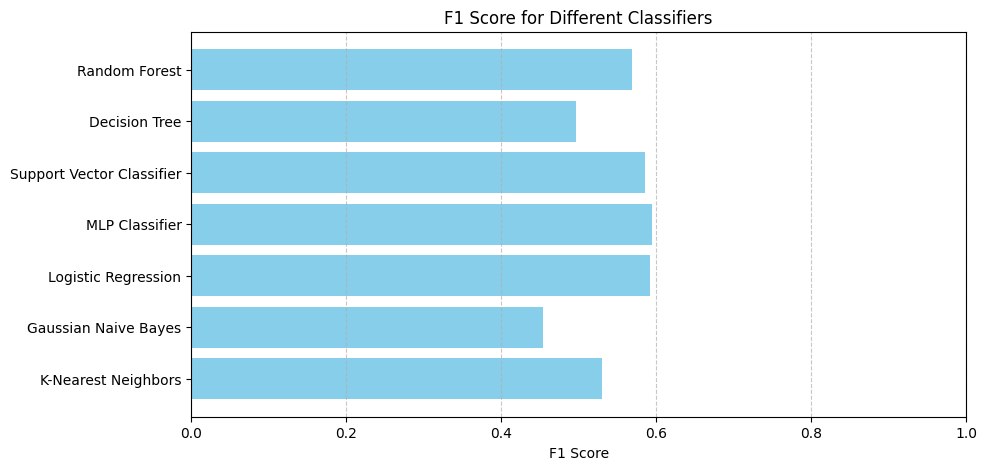

{'K-Nearest Neighbors': 0.5295566502463054, 'Gaussian Naive Bayes': 0.4542372881355932, 'Logistic Regression': 0.5916473317865429, 'MLP Classifier': 0.5945945945945946, 'Support Vector Classifier': 0.5859085290482077, 'Decision Tree': 0.4968814968814969, 'Random Forest': 0.5685534591194968}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score



classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'MLP Classifier': MLPClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

f1_scores = {}


for name, classifier in classifiers.items():

    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', classifier)])

    
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    f1_scores[name] = f1

  
    print(f'---{name}---')
    print('Model score: {model.score(X_test, y_test)}')
    print(classification_report(y_test, y_pred))
    print("\n" + "="*40 + "\n")

plt.figure(figsize=(10, 5))
plt.barh(list(f1_scores.keys()), list(f1_scores.values()), color='skyblue')
plt.xlabel('F1 Score')
plt.title('F1 Score for Different Classifiers')
plt.xlim(0, 1)  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print(f1_scores)

In [ ]:
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data['Month'] = test_data['Date'].dt.month
test_data['Season'] = test_data['Month'].apply(lambda x: (x % 12 + 3) // 3)

test_data.drop(['Date', 'MinTemp', 'Temp9am'], axis = 1, inplace=True)
X_test_data = test_data.drop(['ID'], axis = 1)

numeric_features = X_test_data.select_dtypes(include=['float64']).columns
categorical_features = list(X_test_data.select_dtypes(include=['object', 'int32']).columns) + ['RainToday']

classifier = MLPClassifier()

best_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', classifier)])

best_model.fit(X_train, y_train)

preds = best_model.predict(X_test_data) 
print(preds)


[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
output_preds = pd.DataFrame({
    'ID': test_data['ID'],
    'Predictions': preds
})

output_preds.to_csv('predictions.csv', index=False)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


classifiers = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'params': {
            'classifier__penalty': ['l2'],
            'classifier__C': np.logspace(0, 4, 10)
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200], #number of trees created in the forest
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [None, 5, 10],
            'classifier__min_samples_split': [2, 5]
        }
    },
    {
        'name': 'SVM',
        'model': SVC(),
        'params': {
            'classifier__kernel': ['rbf', 'linear'],
            'classifier__gamma': ['scale', 'auto'],
            'classifier__C': [0.1, 1, 10]
        }
    },
    {
        'name': 'K-Nearest Neighbors',
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    },
    {
        'name': 'Gaussian Naive Bayes',
        'model': GaussianNB(),
        'params': {
            'classifier__var_smoothing': np.logspace(0, -9, num=100)
        }
    },
    {
        'name': 'MLP',
        'model': MLPClassifier(),
        'params': {
            'classifier__hidden_layer_sizes': [(50,), (100,), (150,)],
            'classifier__learning_rate': ['constant', 'adaptive'],
            'classifier__learning_rate_init': [0.001, 0.01],
            'classifier__activation': ['tanh', 'relu']
        }
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10]
        }
    }
]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import warnings


from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)


results_list = []

for clf in classifiers:
    print(f"Running GridSearchCV for {clf['name']}...")

   
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf['model'])
    ])

    
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=clf['params'],
        cv=5,  # 5-fold cross-validation
        scoring='f1_macro', 
        n_jobs=-1, 
        verbose=1
    )


    grid.fit(X_train, y_train)


    y_pred = grid.predict(X_test)

    
    f1 = f1_score(y_test, y_pred, average='macro')

    
    results_list.append({
        'classifier_name': clf['name'],
        'best_params': grid.best_params_,
        'f1_score': f1
    })

    print(f"Completed GridSearchCV for {clf['name']}. Best F1 Score: {f1:.4f}\n")


Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Completed GridSearchCV for Logistic Regression. Best F1 Score: 0.7459

Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Completed GridSearchCV for Random Forest. Best F1 Score: 0.7387

Running GridSearchCV for SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Completed GridSearchCV for SVM. Best F1 Score: 0.7458

Running GridSearchCV for K-Nearest Neighbors...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Completed GridSearchCV for K-Nearest Neighbors. Best F1 Score: 0.7076

Running GridSearchCV for Gaussian Naive Bayes...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Completed GridSearchCV for Gaussian Naive Bayes. Best F1 Score: 0.7219

Running GridSearchCV for MLP...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Completed GridSearchCV for MLP. Best F1 Score:

In [ ]:

results_df = pd.DataFrame(results_list)


print("Best F1 Scores per Classifier:")
print(results_df[['classifier_name', 'f1_score']])


Best F1 Scores per Classifier:
        classifier_name  f1_score
0   Logistic Regression  0.745866
1         Random Forest  0.738706
2                   SVM  0.745758
3   K-Nearest Neighbors  0.707602
4  Gaussian Naive Bayes  0.721872
5                   MLP  0.746202
6         Decision Tree  0.710625


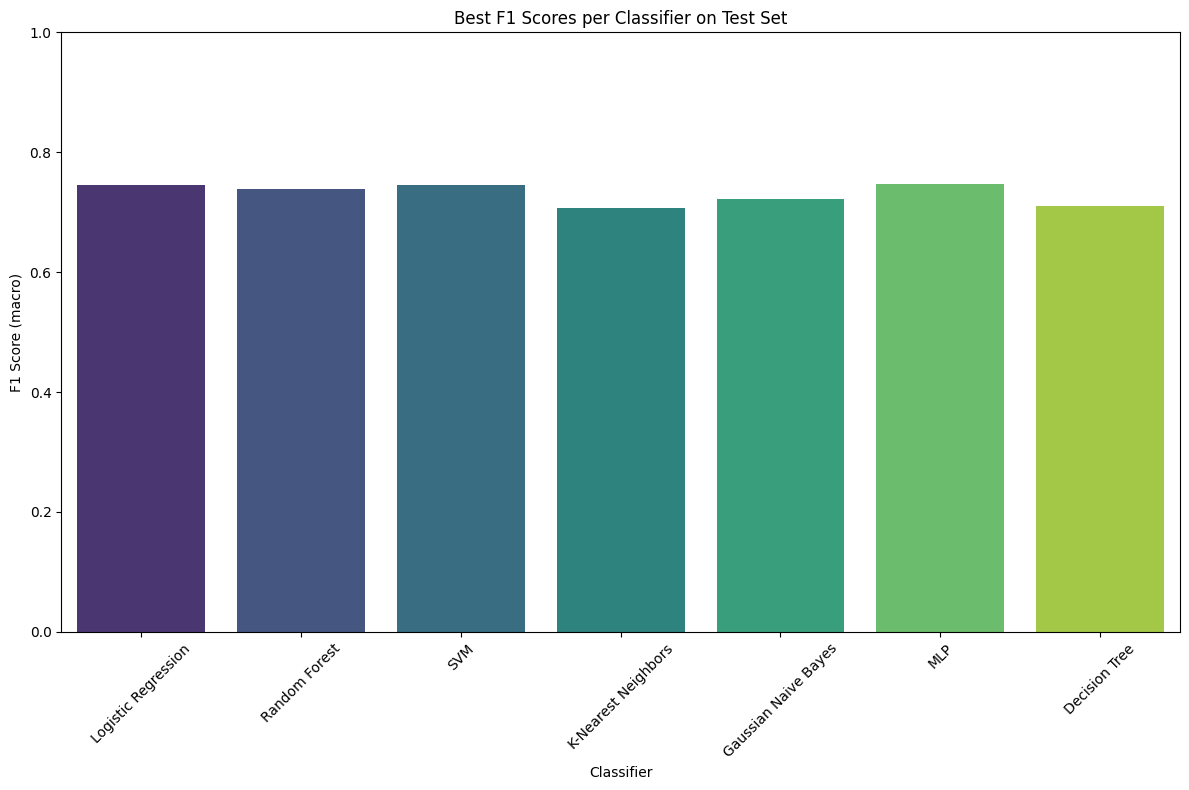

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12,8))
sns.barplot(x='classifier_name', y='f1_score', data=results_df, palette='viridis')
plt.ylabel('F1 Score (macro)')
plt.xlabel('Classifier')
plt.title('Best F1 Scores per Classifier on Test Set')
plt.ylim(0,1)  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

for index, row in results_df.iterrows():
    print(f"Classifier: {row['classifier_name']}")
    print(f"Best Parameters: {row['best_params']}")
    print(f"F1 Score on Test Set: {row['f1_score']:.4f}\n")


Classifier: Logistic Regression
Best Parameters: {'classifier__C': 21.544346900318832, 'classifier__penalty': 'l2'}
F1 Score on Test Set: 0.7459

Classifier: Random Forest
Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
F1 Score on Test Set: 0.7387

Classifier: SVM
Best Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
F1 Score on Test Set: 0.7458

Classifier: K-Nearest Neighbors
Best Parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 7}
F1 Score on Test Set: 0.7076

Classifier: Gaussian Naive Bayes
Best Parameters: {'classifier__var_smoothing': 0.657933224657568}
F1 Score on Test Set: 0.7219

Classifier: MLP
Best Parameters: {'classifier__activation': 'relu', 'classifier__hidden_layer_sizes': (150,), 'classifier__learning_rate': 'constant', 'classifier__learning_rate_init': 0.01}
F1 Score on Test Set: 0.7462

Classifie

In [ ]:
classifier = MLPClassifier()

best_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', classifier)])

best_model.fit(X_train, y_train)

preds = best_model.predict(X_test_data) 
print(preds)

[0 0 0 ... 0 1 0]


In [ ]:
output_preds = pd.DataFrame({
    'ID': test_data['ID'],  
    'Predictions': preds 
})

output_preds.to_csv('new_predictions.csv', index=False) 